In [5]:
data = {
    "orbitrap train": {
        "SpecEmbedding": {
            "mean": [80.85, 91.84, 94.11],
            "std": [0.06, 0.04, 0.02]
        },
        "MSBERT": {
            "mean": [76.46, 88.41, 90.66],
            "std": [0.05, 0.05, 0.04]
        },
        "DreaMS": {
            "mean": [71.20, 83.55, 86.78],
            "std": [0.04, 0.04, 0.03]
        },
        "Spec2Vec": {
            "mean": [69.80, 82.09, 84.77],
            "std": [0.04, 0.03, 0.03]
        },
        "MS2DeepScore": {
            "mean": [65.25, 79.87, 83.81],
            "std": [0.05, 0.05, 0.04]
        }
    },
    "orbitrap test": {
        "SpecEmbedding": {
            "mean": [81.73, 93.03, 94.82],
            "std": [0.49, 0.36, 0.30]
        },
        "MSBERT": {
            "mean": [77.81, 89.19, 91.30],
            "std": [0.77, 0.77, 0.64]
        },
        "DreaMS": {
            "mean": [71.90, 84.19, 87.02],
            "std": [0.58, 0.71, 0.62]
        },
        "Spec2Vec": {
            "mean": [70.44, 82.56, 84.93],
            "std": [0.48, 0.69, 0.57]
        },
        "MS2DeepScore": {
            "mean": [63.23, 78.98, 83.25],
            "std": [0.77, 0.77, 0.64]
        }
    },
    "qtof": {
        "SpecEmbedding": {
            "mean": [50.01, 68.93, 74.62],
            "std": [0.17, 0.22, 0.26]
        },
        "MSBERT": {
            "mean": [49.42, 66.33, 70.30],
            "std": [0.34, 0.29, 0.22]
        },
        "DreaMS": {
            "mean": [52.43, 70.40, 74.25],
            "std": [0.29, 0.28, 0.30]
        },
        "Spec2Vec": {
            "mean": [43.32, 59.19, 63.94],
            "std": [0.20, 0.41, 0.40]
        },
        "MS2DeepScore": {
            "mean": [38.28, 55.07, 60.19],
            "std": [0.36, 0.31, 0.23]
        }
    },
    "other":{
        "SpecEmbedding": {
            "mean": [81.03, 93.82, 95.78],
            "std": [0.29, 0.27, 0.18]
        },
        "MSBERT": {
            "mean": [74.82, 88.43, 90.78],
            "std": [0.50, 0.44, 0.44]
        },
        "DreaMS": {
            "mean": [74.39, 88.72, 91.38],
            "std": [0.41, 0.21, 0.16]
        },
        "Spec2Vec": {
            "mean": [69.35, 81.95, 84.41],
            "std": [0.25, 0.23, 0.19]
        },
        "MS2DeepScore": {
            "mean": [50.66, 66.05, 70.85],
            "std": [0.52, 0.42, 0.46]
        }
    }
}

In [6]:
from pathlib import Path
DIR = Path("./hit")
DIR.mkdir(exist_ok=True, parents=True)

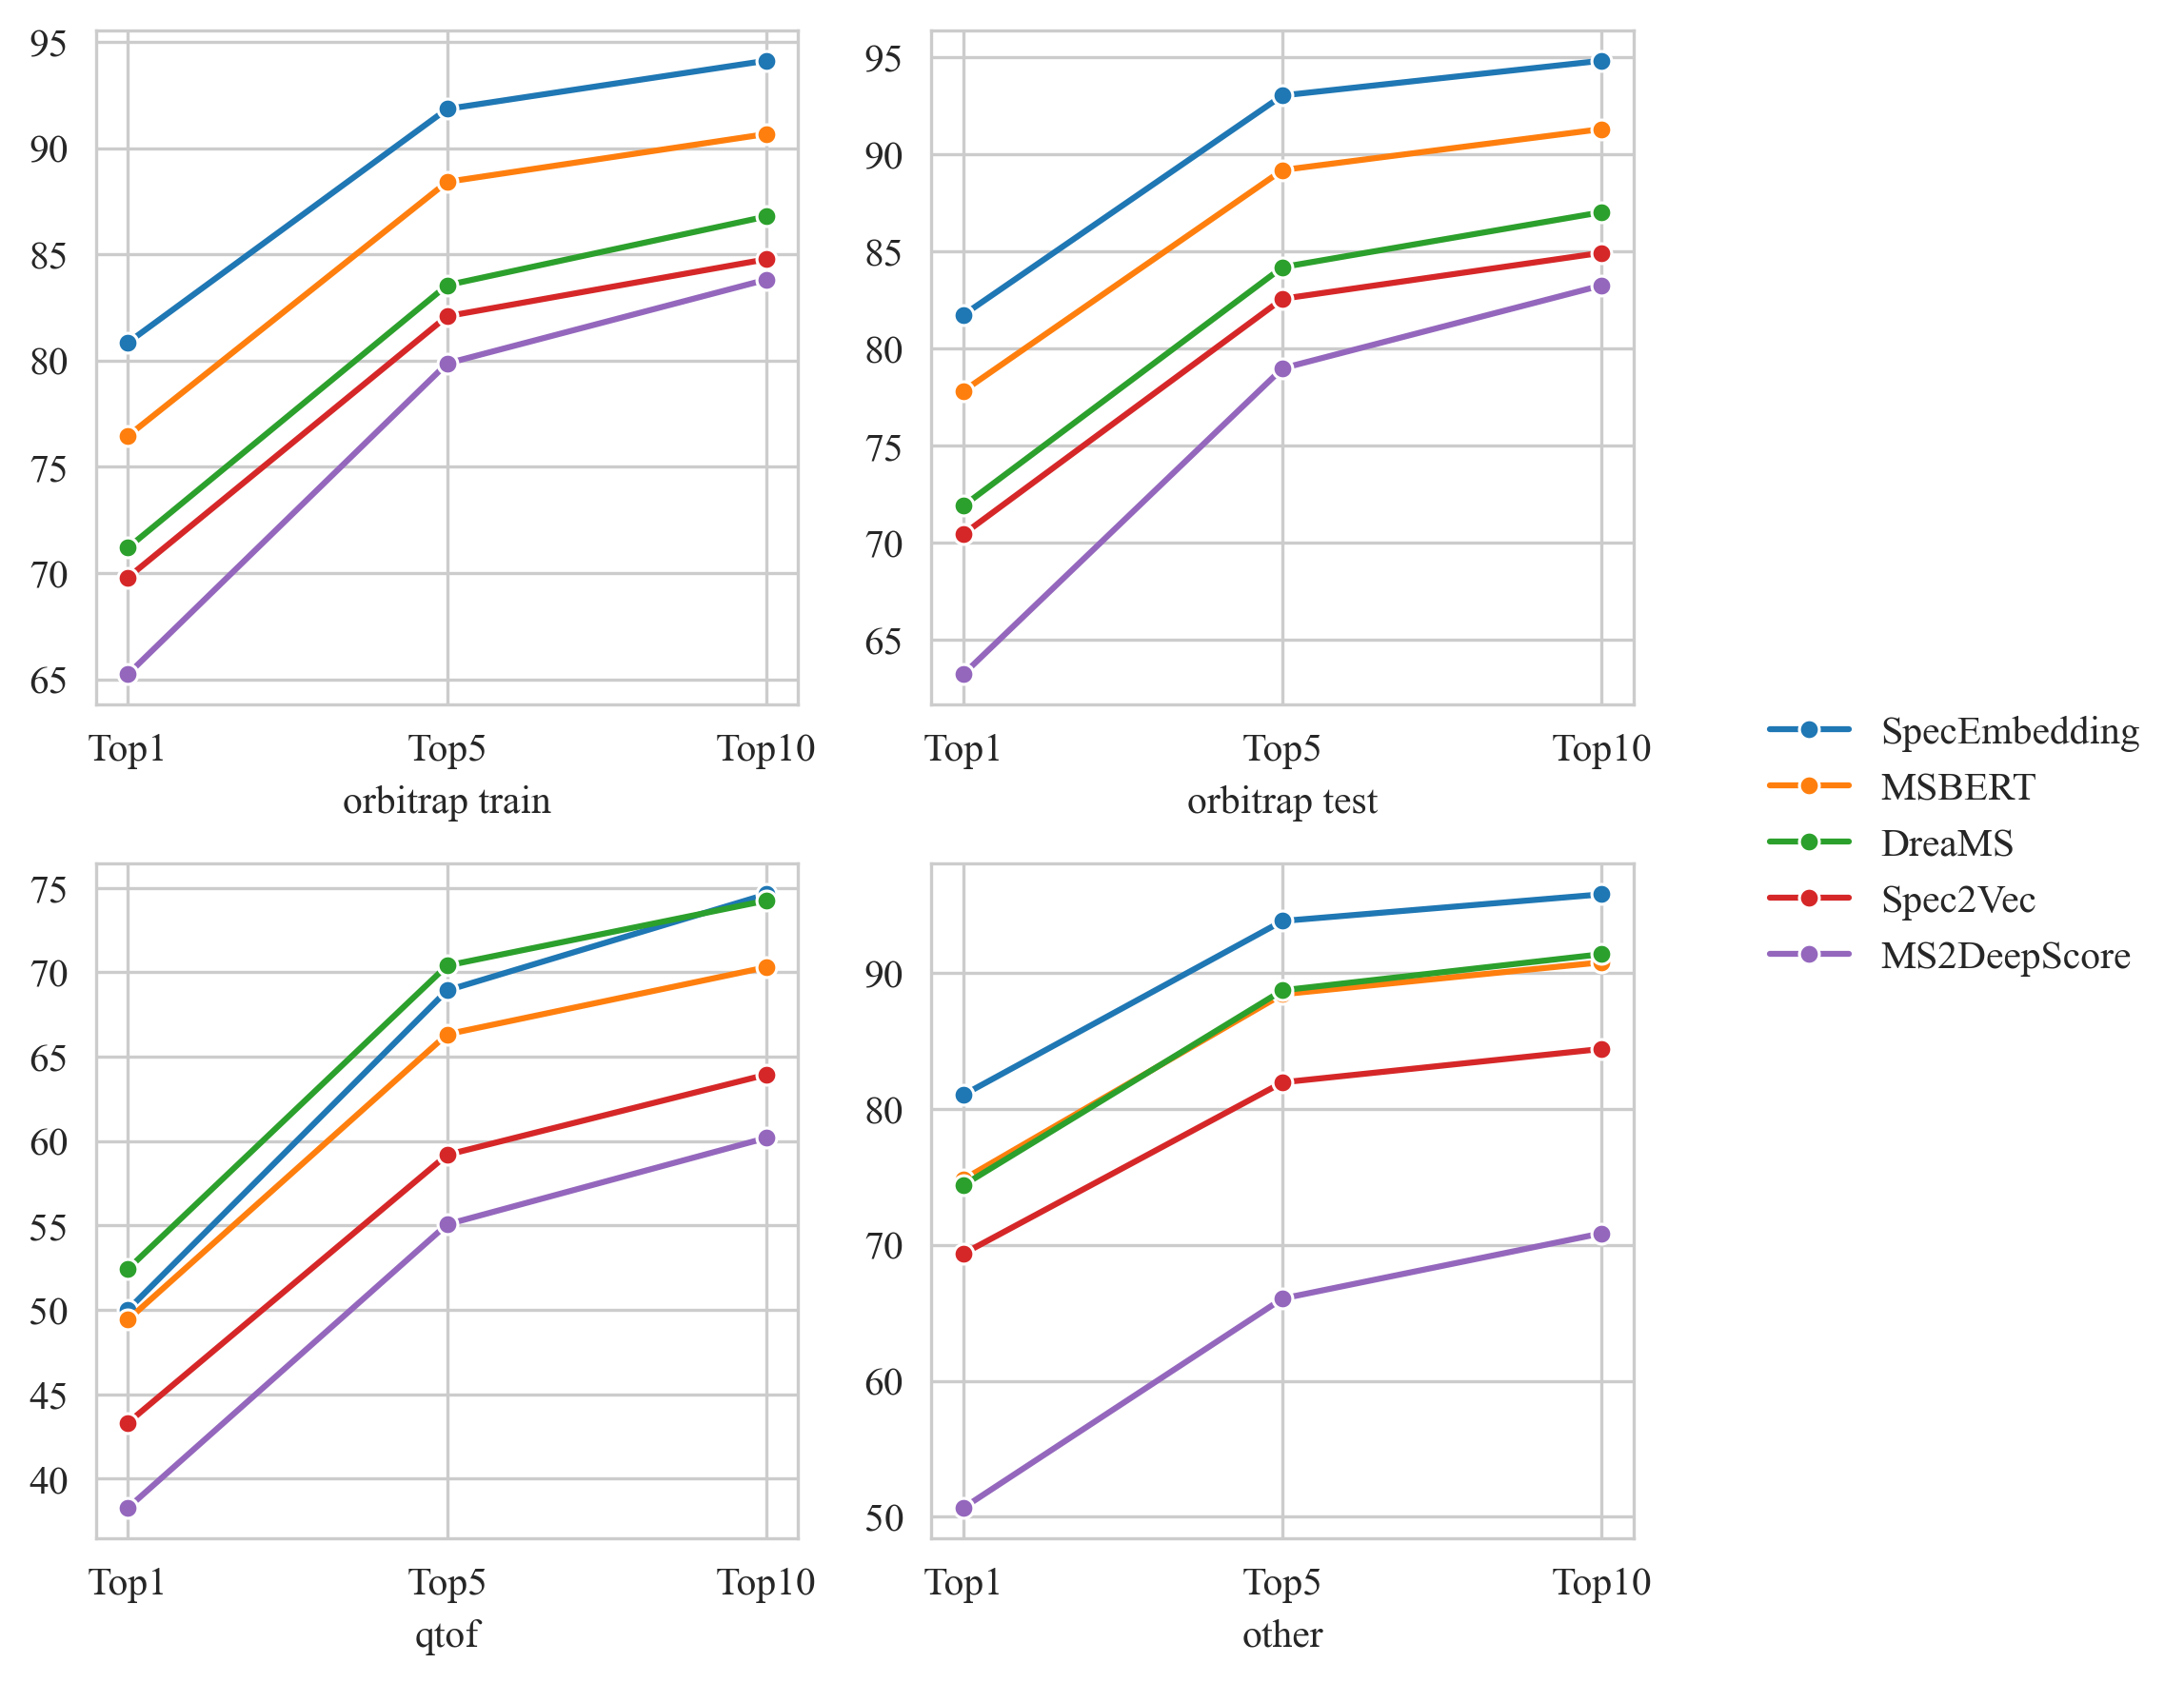

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes
import matplotlib.font_manager as fm

sns.set_style("whitegrid")
sns.set_palette("tab10")

fm.fontManager.addfont('/usr/share/fonts/truetype/msttcorefonts/times.ttf')
plt.rcParams['font.family'] = 'Times New Roman'

figure, axs = plt.subplots(2, 2, dpi=300, figsize=(6, 6))
axs: list[list[Axes]]
figure: Figure

for i, (dataset, method_values) in enumerate(data.items()):
    row, col = i // 2, i % 2
    ax = axs[row][col]
    for method, values in method_values.items():
        mean_values = np.array(values["mean"])
        std_values = np.array(values["std"])
        x = np.arange(0, len(mean_values))
        sns.lineplot(x=x, y=mean_values, ax=ax, marker="o", markersize=5, label=method)
        # ax.fill_between(x, mean_values - std_values, mean_values + std_values, alpha=0.25)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["Top1", "Top5", "Top10"])
    ax.set_xlabel(dataset)
    ax.legend().remove()
figure.legend(*ax.get_legend_handles_labels(), bbox_to_anchor=(1.02, 0.4), loc="lower left", ncol=1, frameon=False)
figure.tight_layout()

In [13]:
figure.savefig(DIR / "hit_accuracy.pdf", bbox_inches="tight", transparent=True)
figure.savefig(DIR / "hit_accuracy.svg", bbox_inches="tight", transparent=True)
figure.savefig(DIR / "hit_accuracy.png", bbox_inches="tight", transparent=True)